# Workshop 10: Interpolation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from functions import eqnorm, qrLS, SVDLS, InterpL, plagr

## Exercise 1
Use the three implemented methods to compute the least squares approximation for the following data sets:

$$
\begin{array}{l}
x_1 = [-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3] ;\\
y_1 = [-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1] ;\\
x_2 = [-3.14, -2.4, -1.57, -0.7, -0.3, 0, 0.4, 0.7, 1.57] ;\\
y_2 = [0.02, -1, -0.9, -0.72, -0.2, -0.04, 0.65, 0.67, 1.1] ;\\
x_3 = [1.001, 1.004, 1.005, 1.0012, 1.0013, 1.0014, 1.0015, 1.0016] ;\\
y_3 = [-1.2, -0.95, -0.9, -1.15, -1.1, -1] ;\\
\end{array}
$$

for polynomial degrees $n$ from 1 to 4.

Indice di condizionamento di G  5.27297104169736
residio eqn: 4.954617839084975
residio qr: 4.954617839084975
rango = 2
residio svd: 4.954617839084975


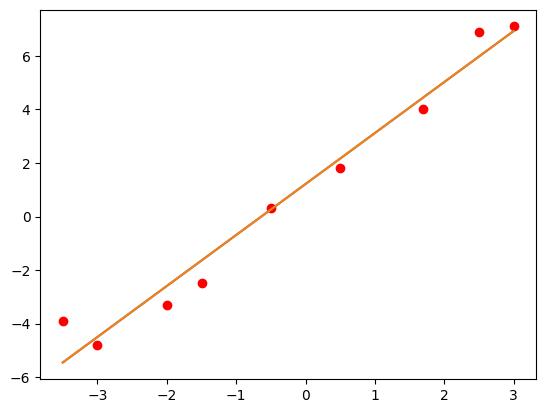

In [10]:
x = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
# Uncomment below for other datasets
# x = np.array([-3.14, -2.4, -1.57, -0.7, -0.3, 0, 0.4, 0.7, 1.57])
# y = np.array([0.02, -1, -0.9, -0.72, -0.2, -0.04, 0.65, 0.67, 1.1])
# x = np.array([1.001, 1.004, 1.005, 1.0012, 1.0013, 1.0014, 1.0015, 1.0016])
# y = np.array([-1.2, -1.0, -0.98, -0.95, -0.9, -1.15, -1.1, -1])

m = x.shape[0]
n = 1
n1 = n + 1

A = np.vander(x, increasing=True)[:, :n1]
alpha_eqn = eqnorm(A, y)
resid_eqn = np.linalg.norm(A @ alpha_eqn - y.reshape(m, 1)) ** 2
print("EQN residual:", resid_eqn)

alpha_qr, resid_qr = qrLS(A, y)
print("QR residual:", resid_qr)

alpha_svd, resid_svd = SVDLS(A, y)
print("SVD residual:", resid_svd)

xv = np.linspace(np.min(x), np.max(x), 100)
pol_EQN = np.polyval(np.flip(alpha_eqn), xv)
pol_QR = np.polyval(np.flip(alpha_qr), xv)
pol_SVD = np.polyval(np.flip(alpha_svd), xv)
plt.plot(x, y, "ro", xv, pol_QR, xv, pol_SVD)
plt.legend(["Data points", "QR fit", "SVD fit"])
plt.show()

## Exercise 2
Given the data $(x_i, y_i)$ in the following arrays:

$$
\begin{array}{l}
x = [0.0004, 0.2507, 0.5008, 2.0007, 8.0013]  ;\\
y = [0.0007, 0.0162, 0.0288, 0.0309, 0.0310] ;
\end{array}
$$

- Fit a regression line (degree 1 polynomial)
- Fit a parabola (degree 2 polynomial) using least squares

Which approximation is better? (Compare the plots and the squared Euclidean norm of the residual vector.)

condizionamento di A2  4.663457775986456
Indice di condizionamento di G  21.747838428408542


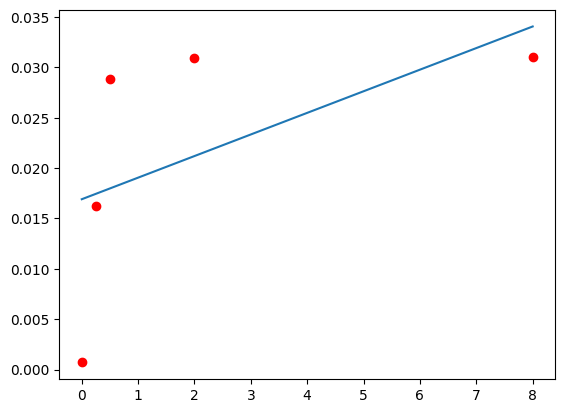

residuo eqn  0.0004848327762313227


In [11]:
x2 = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013])
y2 = np.array([0.0007, 0.0162, 0.0288, 0.0309, 0.0310])

m = x2.shape[0]
n = 1
n1 = n + 1

A2 = np.vander(x2, increasing=True)[:, :n1]
condA2 = np.linalg.cond(A2)
print("Condition number of A2:", condA2)

alpha2 = eqnorm(A2, y2)
xv = np.linspace(np.min(x2), np.max(x2), 100)
pol2 = np.polyval(np.flip(alpha2), xv)
plt.plot(xv, pol2, x2, y2, "ro")
plt.legend(["Regression line", "Data points"])
plt.show()

residual = np.linalg.norm(A2 @ alpha2 - y2.reshape(m, 1)) ** 2
print("EQN residual:", residual)

condizionamento di A2  65.67493525624779


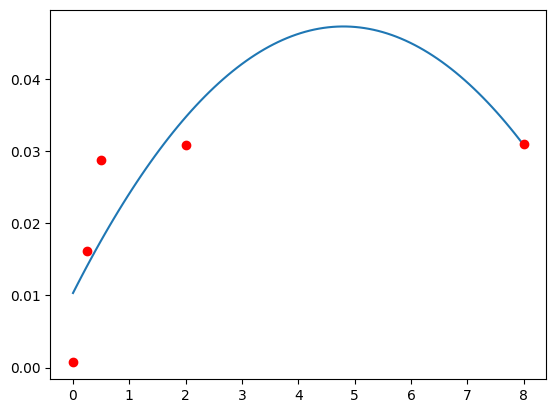

residuo  0.0002364635594024983


In [12]:
n = 2  # regression parabola: degree 2
n1 = n + 1
A2 = np.vander(x2, increasing=True)[:, :n1]
condA2 = np.linalg.cond(A2)
print("Condition number of A2:", condA2)

# Since the matrix is reasonably well-conditioned, QR is preferred
alpha2, resid_QR = qrLS(A2, y2)
xv = np.linspace(np.min(x2), np.max(x2), 100)
pol2 = np.polyval(np.flip(alpha2), xv)

plt.plot(xv, pol2, x2, y2, "ro")
plt.legend(["Regression parabola", "Data points"])
plt.show()
print("QR residual:", resid_QR)

## Exercise 3
Write a script to compute the Lagrange interpolating polynomials for the test functions $\sin(x)$ and $\cos(x)$ at the points $x_k = k \pi/2$, with $k = 0, 1, 2, 3, 4$. Plot the resulting polynomials together with the original functions.

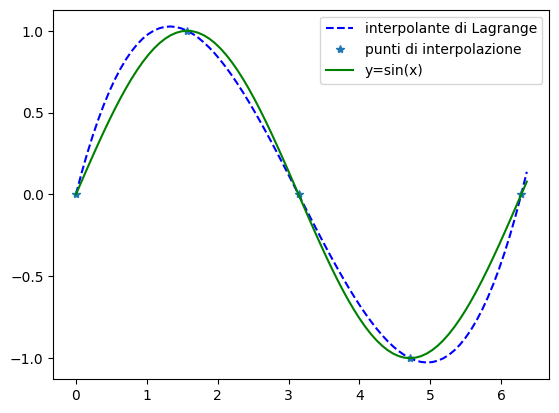

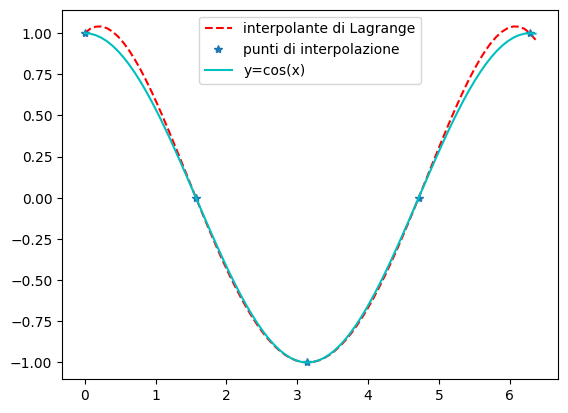

In [13]:
x = np.arange(0, 2 * np.pi + 0.1, np.pi / 2)
y = np.sin(x)

xx = np.arange(0, 2 * np.pi + 0.1, np.pi / 40)
yy = InterpL(x, y, xx)

plt.plot(xx, yy, "b--", x, y, "*", xx, np.sin(xx), "g-")
plt.legend(["Lagrange interpolant", "Interpolation points", "y=sin(x)"])
plt.show()

y = np.cos(x)
yy = InterpL(x, y, xx)
plt.plot(xx, yy, "r--", x, y, "*", xx, np.cos(xx), "c-")
plt.legend(["Lagrange interpolant", "Interpolation points", "y=cos(x)"])
plt.show()

## Exercise 4
Write a Python script to interpolate the pairs $x_i, y_i$, $i=0,\ldots,3$ where $x_i$ are equally spaced points in $[-1,1]$ and $y_i=f(x_i)$ with $f(x)=3x^3+2x^2+2x-1$.

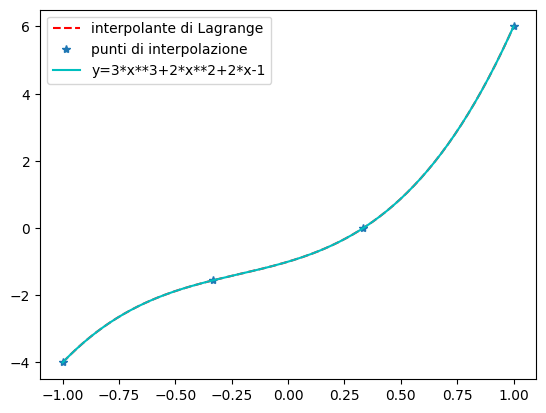

In [ ]:
x = np.linspace(-1, 1, 4)
f = lambda x: 3 * x**3 + 2 * x**2 + 2 * x - 1

y = f(x)
xx = np.linspace(-1, 1, 200)

polL = InterpL(x, y, xx)
plt.plot(xx, polL, "r--", x, y, "*", xx, f(xx), "c-")
plt.legend([
    "Lagrange interpolant", "Interpolation points", "y=3*x**3+2*x**2+2*x-1"
])
plt.show()

## Exercise 5
The temperature $T$ near the ground varies with latitude $L$ as follows:

L = np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T = np.array([3.7, 3.7, 3.52, 3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])

Build a model to describe $T = T(L)$ for unmeasured latitudes. Write a script to estimate the temperature at $L = \pm 42$ using the interpolating polynomial. Plot the data, the interpolant, and the estimates for $L = \pm 42$.

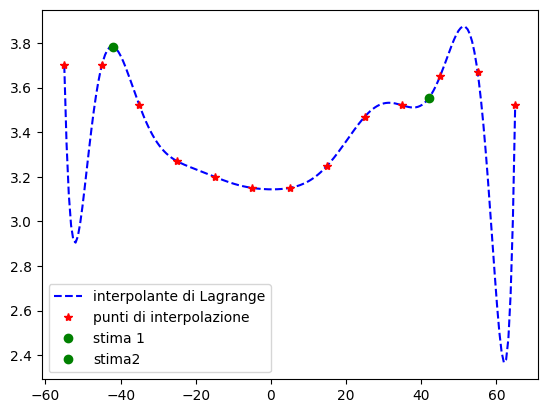

In [ ]:
L = np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T = np.array([
    3.7, 3.7, 3.52, 3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52
])

xx = np.linspace(np.min(L), np.max(L), 200)
pol = InterpL(L, T, xx)

L1 = np.array([42])
pol42 = InterpL(L, T, L1)

L2 = np.array([-42])
pol_42 = InterpL(L, T, L2)

plt.plot(xx, pol, "b--", L, T, "r*", 42, pol42, "og", -42, pol_42, "og")
plt.legend([
    "Lagrange interpolant", "Interpolation points", "Estimate at 42", "Estimate at -42"
])
plt.show()

## Exercise 6
Write a script to compute the Lagrange interpolating polynomial for a set of points $P_i =(x_i, y_i)$, $i = 0, ..., n$, where $x_i$ are either:
- equally spaced points in $[a, b]$,
- Chebyshev nodes in $[a, b]$:
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n
$$

and $y_i = f(x_i)$ for a test function $f: [a, b] \rightarrow \mathbb{R}$. Test the script on:
- $f(x) = \sin(x)-2 \sin(2x)$, $x \in [-\pi,\pi]$
- $f(x) = \sinh(x)$, $x \in [-2, 2]$
- $f(x) = |x|$, $x \in [-1, 1]$
- $f(x) = 1/(1+25x^2)$, $x \in [-1, 1]$ (Runge function)

Compute the interpolation error $r(x) = f(x)-p(x)$, plot $f(x)$ and $p(x)$, and plot $|r(x)|$. What do you observe as the degree $n$ increases? (Build a table of $\|r(x)\|_{\infty}$ for varying $n$.)

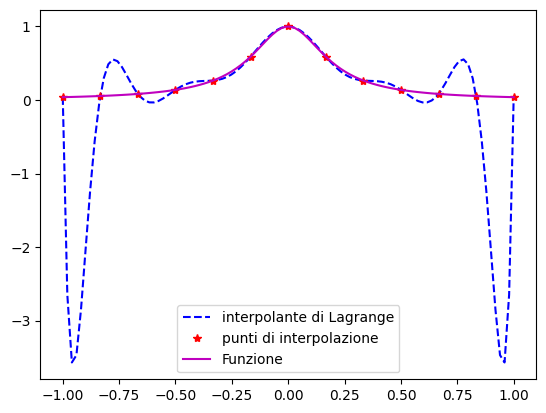

Norma infinito di r  3.6117015978055744


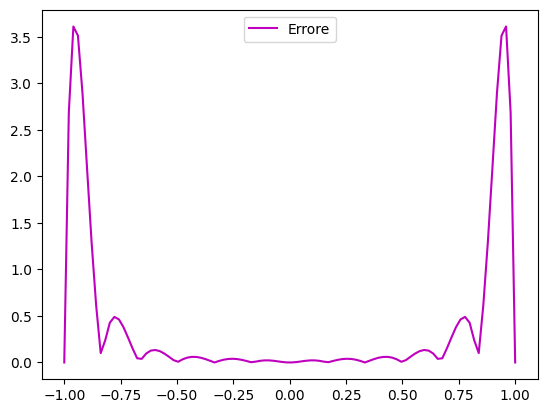

In [ ]:
def chebyshev_nodes(a, b, n):
    t1 = (a + b) / 2
    t2 = (b - a) / 2
    x = np.zeros((n + 1,))
    for k in range(n + 1):
        x[k] = t1 + t2 * np.cos(((2 * k + 1) / (2 * (n + 1)) * np.pi))
    return x

choice_f = input("Choose function: 1) sin(x)-2sin(2x), 2) sinh(x), 3) |x|, 4) Runge\n")

if choice_f == "1":
    f = lambda x: np.sin(x) - 2 * np.sin(2 * x)
    a = -np.pi
    b = np.pi
elif choice_f == "2":
    f = lambda x: np.sinh(x)
    a = -2.0
    b = 2.0
elif choice_f == "3":
    f = lambda x: np.abs(x)
    a = -1.0
    b = 1.0
elif choice_f == "4":
    f = lambda x: 1 / (1 + 25 * x**2)
    a = -1
    b = 1
else:
    raise ValueError("Invalid choice")

choice_p = input("Choose node type: 1) equally spaced 2) Chebyshev\n")
n = int(input("Degree of the polynomial: "))

if choice_p == "1":
    x = np.linspace(a, b, n + 1)
elif choice_p == "2":
    x = chebyshev_nodes(a, b, n)
else:
    raise ValueError("Invalid choice")

xx = np.linspace(a, b, 100)
y = f(x)
pol = InterpL(x, y, xx)

plt.plot(xx, pol, "b--", x, y, "r*", xx, f(xx), "m-")
plt.legend(["Lagrange interpolant", "Interpolation points", "Function"])
plt.show()

r = np.abs(f(xx) - pol)
norm_inf_r = np.linalg.norm(r, np.inf)
print("Infinity norm of error:", norm_inf_r)
plt.plot(xx, r, "m-")
plt.legend(["Error"])
plt.show()

## Exercise 7
For $n = 5, 10, 15, 20$, provide an approximation of the Lebesgue constant using $x_1, ..., x_{n+1}$ equally spaced in $[-1, 1]$ or as Chebyshev nodes $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}\right)$, $i =1, ..., n + 1$.

Costante di Lebesgue con nodi equispaziati al variare di n: 
  [[3.10493825e+00]
 [2.98943063e+01]
 [5.08711306e+02]
 [1.07596490e+04]]
Costante di Lebesgue con nodi di Chebyshev al variare di n: 
 [[2.10439768]
 [2.48943038]
 [2.72777794]
 [2.90082492]]


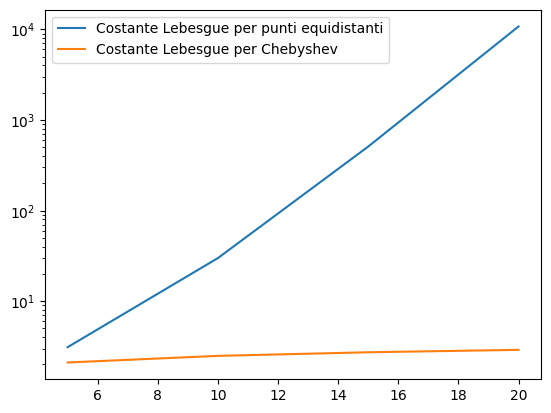

In [ ]:
xv = np.linspace(-1, 1, 200)
LLe = np.zeros((4, 1))
LLc = np.zeros((4, 1))

for i, n in enumerate(range(5, 25, 5)):
    xe = np.linspace(-1, 1, n + 1)
    xc = chebyshev_nodes(-1, 1, n)
    Le = np.zeros((200, 1))
    Lc = np.zeros((200, 1))
    for l in range(n + 1):
        pe = plagr(xe, l)
        Le += np.abs(np.polyval(pe, xv))
        pc = plagr(xc, l)
        Lc += np.abs(np.polyval(pc, xv))
    LLe[i] = np.max(Le)
    LLc[i] = np.max(Lc)

print("Lebesgue constant for equally spaced nodes as n varies:\n", LLe)
plt.semilogy(range(5, 25, 5), LLe, range(5, 25, 5), LLc)
plt.legend([
    "Lebesgue constant (equally spaced)", "Lebesgue constant (Chebyshev)"
])
plt.show()
print("Lebesgue constant for Chebyshev nodes as n varies:\n", LLc)

## Exercise 8
Interpolate the 22 points $(x_i, y_i)$ with $x_i$ equally spaced in $[-1, 1]$ and $y_i = \sin(2 \pi x_i)$ using the polynomial $p_{21}(x)$. Then, consider the perturbed ordinates $\tilde{y}_i = y_i + \varepsilon_i$, where $\varepsilon_i$ is the $i$-th component of $0.0002*np.random.random(22,)$. Compute the corresponding interpolating polynomial $\tilde{p}_{21}(x)$. Plot and comment on the results, also computing the relative error on the interpolating polynomial and on the data.

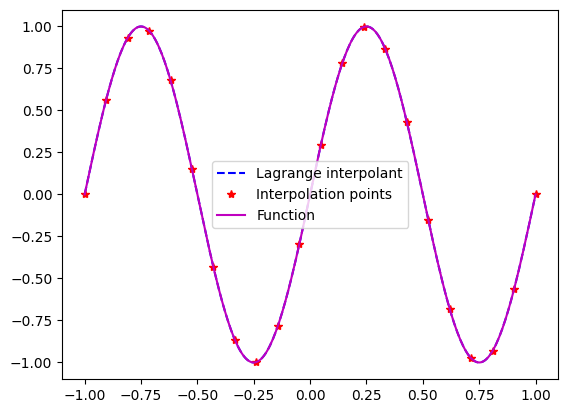

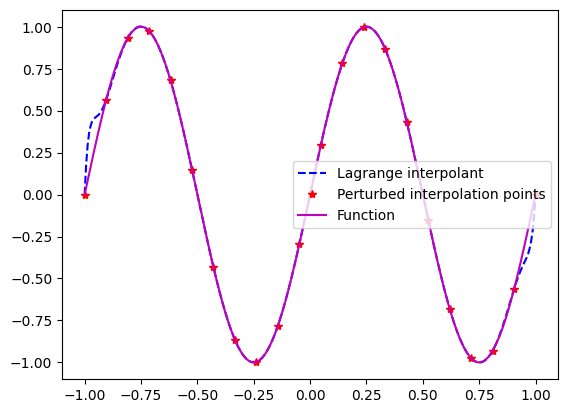

Relative error on data: 0.00019570345492260415
Relative error on results: 0.2444484173283934


In [19]:
f = lambda x: np.sin(2 * np.pi * x)
x = np.linspace(-1, 1, 22)
y1 = f(x)

y2 = y1.copy() + 0.0002 * np.random.random(22)

xx = np.linspace(-1, 1, 300)
pol1 = InterpL(x, y1, xx)
pol2 = InterpL(x, y2, xx)

plt.plot(xx, pol1, "b--", x, y1, "r*", xx, f(xx), "m-")
plt.legend(["Lagrange interpolant", "Interpolation points", "Function"])
plt.show()

plt.plot(xx, pol2, "b--", x, y2, "r*", xx, f(xx), "m-")
plt.legend([
    "Lagrange interpolant", "Perturbed interpolation points", "Function"
])
plt.show()

# Relative error on data
errrel_data = np.linalg.norm(y2 - y1, np.inf) / np.linalg.norm(y1, np.inf)
# Relative error on results
errrel_results = np.linalg.norm(pol2 - pol1, np.inf) / np.linalg.norm(pol1, np.inf)

print("Relative error on data:", errrel_data)
print("Relative error on results:", errrel_results)